<a href="https://colab.research.google.com/github/ramak7262/Chatbot-Customer-Service-/blob/main/Chatbot_for_Customer_Service_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 Chatbot for Customer Service
1. Install & Import Libraries

In [1]:
# ===============================
# 📌 Chatbot for Customer Service
# ===============================

# 1. Install & Import Libraries
import numpy as np
import random
import json
import nltk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


2. Prepare Dataset (Intents.json)

In [ ]:
import json

intents ={
  "intents": [
    {
      "tag": "greeting",
      "patterns": ["Hi", "Hello", "Hey", "Good morning", "Good evening"],
      "responses": ["Hello! How can I help you today?", "Hi there! What can I do for you?"]
    },
    {
      "tag": "goodbye",
      "patterns": ["Bye", "See you later", "Goodbye"],
      "responses": ["Goodbye! Have a nice day!", "See you soon!"]
    },
    {
      "tag": "thanks",
      "patterns": ["Thanks", "Thank you", "That's helpful"],
      "responses": ["You're welcome!", "Happy to help!"]
    },
    {
      "tag": "product_query",
      "patterns": ["What products do you offer?", "Tell me about your services", "Do you have laptops?"],
      "responses": ["We offer laptops, phones, and accessories.", "Our services include tech support and repairs."]
    },
    {
      "tag": "hours",
      "patterns": ["What are your hours?", "When are you open?", "Opening hours?"],
      "responses": ["We are open 9am-6pm Monday to Saturday."]
    },
    {
      "tag": "payments",
      "patterns": ["Do you accept credit cards?", "Can I pay with PayPal?", "Payment options?"],
      "responses": ["We accept credit cards, PayPal, and UPI payments."]
    }
  ]
}

# Save file
with open("intents.json", "w") as f:
    json.dump(intents, f, indent=2)

print("✅ intents.json file created in Colab!")


✅ intents.json file created in Colab!


3. Data Preprocessing

In [ ]:
# Load dataset
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

with open('intents.json') as file:
    data = json.load(file)

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',']

# Tokenize patterns
for intent in data['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lowercase
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

print("Words:", words)
print("Classes:", classes)

Words: ["'s", 'about', 'accept', 'are', 'bye', 'can', 'card', 'credit', 'do', 'evening', 'good', 'goodbye', 'have', 'hello', 'helpful', 'hey', 'hi', 'hour', 'i', 'laptop', 'later', 'me', 'morning', 'offer', 'open', 'opening', 'option', 'pay', 'payment', 'paypal', 'product', 'see', 'service', 'tell', 'thank', 'thanks', 'that', 'what', 'when', 'with', 'you', 'your']
Classes: ['goodbye', 'greeting', 'hours', 'payments', 'product_query', 'thanks']


4. Training Data Preparation

In [ ]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in doc[0]]
    for w in words:
        bag.append(1 if w in word_patterns else 0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_x = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))


5. Build and Train Model

In [ ]:
# Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1, validation_split=0.2)

# Save model
model.save("chatbot_model.h5")
print("✅ Model Trained & Saved!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.0967 - loss: 1.9329 - val_accuracy: 0.0000e+00 - val_loss: 1.8618
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3133 - loss: 1.8771 - val_accuracy: 0.2500 - val_loss: 1.8705
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3917 - loss: 1.7591 - val_accuracy: 0.0000e+00 - val_loss: 1.8812
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1350 - loss: 1.7738 - val_accuracy: 0.0000e+00 - val_loss: 1.8910
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3917 - loss: 1.8218 - val_accuracy: 0.0000e+00 - val_loss: 1.9005
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3133 - loss: 1.7230 - val_accuracy: 0.0000e+00 - val_loss: 1.9091
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2933 - loss: 1.7067 - val_accuracy: 0.0000e+00 - val_loss: 1.9190
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4300 - loss: 1.6746 - val_accu

✅ Model Trained & Saved!


6. Plot Training Accuracy & Loss

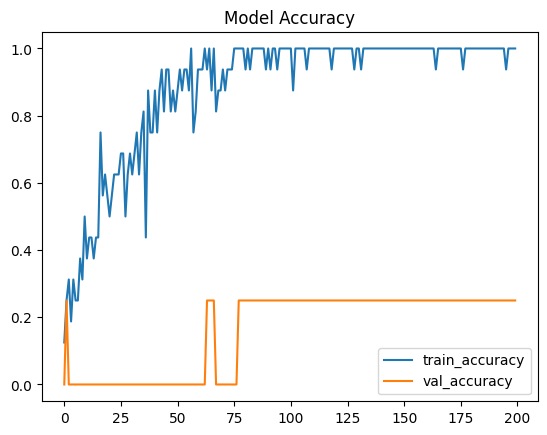

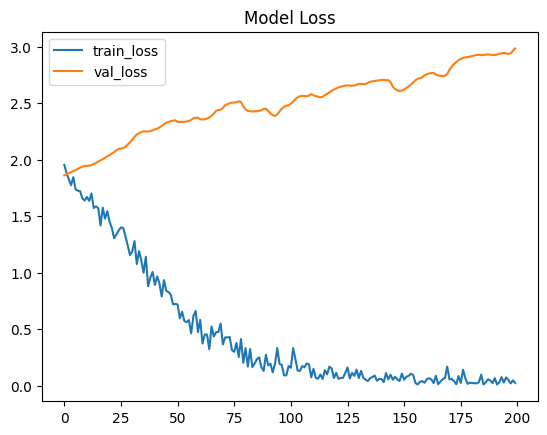

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.savefig("training_accuracy.png")
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Model Loss")
plt.savefig("training_loss.png")
plt.show()


7. Chatbot Response Function

In [ ]:
def clean_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bag_of_words(sentence, words):
    sentence_words = clean_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
    return np.array(bag)

def predict_class(sentence):
    bow = bag_of_words(sentence, words)
    res = model.predict(np.array([bow]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def get_response(intents_list, intents_json):
    if len(intents_list) == 0:
        return "Sorry, I didn’t understand that."
    tag = intents_list[0]['intent']
    for i in intents_json['intents']:
        if i['tag'] == tag:
            return random.choice(i['responses'])

def chatbot_response(msg):
    ints = predict_class(msg)
    res = get_response(ints, data)
    return res


8. Test the Chatbot

In [ ]:
print("🤖 Chatbot is ready! Type 'quit' to exit.")
while True:
    msg = input("You: ")
    if msg.lower() == "quit":
        break
    res = chatbot_response(msg)
    print("Bot:", res)


🤖 Chatbot is ready! Type 'quit' to exit.
You: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Bot: Hi there! What can I do for you?
You: how are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Bot: We are open 9am-6pm Monday to Saturday.
You: can yoy please solve a prblem for me
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Bot: Hello! How can I help you today?
You: i need my order id
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Bot: Hi there! What can I do for you?
You: quit
